In [ ]:
#### Ethnicity
import pandas as pd
import sqlite3
from contextlib import closing
import psycopg2

nct_id_list = ['NCT01306032', 'NCT02163694', 'NCT02282020', 'NCT02000622', 'NCT02032823', 
               'NCT03167619', 'NCT01818063', 'NCT01905592', 'NCT01116648', 'NCT01945775', 
               'NCT01506609', 'NCT03330847']

def extract_aact(nct_ids):
    connection = psycopg2.connect(
        database="aact",
        user= "achang",
        password="AChang2608",
        host="aact-db.ctti-clinicaltrials.org",
    )

    with closing(connection.cursor()) as cursor:
        # Prepare the SQL query with format string for nct_ids
        query = f"""
            SELECT nct_id, result_group_id, ctgov_group_code, param_value, classification, category
            FROM baseline_measurements
            WHERE (title = 'Race (NIH/OMB)' OR title = 'Race/Ethnicity, Customized')
            AND nct_id IN ({', '.join(["'%s'" % id for id in nct_ids])});
        """
        cursor.execute(query)
        patients = cursor.fetchall()

    columns = [
        'nct_id',
        'result_group_id',
        'ctgov_group_code',
        'number',
        'classification',
        'category',
    ]

    df = pd.DataFrame(patients, columns=columns)

    nunique=df['nct_id'].nunique()
    unique_nct_ids = df['nct_id'].unique()
    #print(unique_nct_ids)
    #print(nunique)
    return(df)
    



extracted_race= extract_aact(nct_id_list)
#print(extracted_race)


max_result_group_id = extracted_race.groupby('nct_id')['result_group_id'].transform('max')

# Select rows where 'result_group_id' is equal to the max within its group
filtered_extracted_race = extracted_race[extracted_race['result_group_id'] == max_result_group_id]

print(filtered_extracted_race)

filtered_extracted_race.loc[filtered_extracted_race['category'].isnull(), 'category'] = filtered_extracted_race['classification']

category_mapping = {
    'Black': 'Black or African American',
    'BLACK OR AFRICAN AMERICAN' : 'Black or African American',
    'Black Or African American' : 'Black or African American',
    'ASIAN' : 'Asian',
    'NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER': 'Native Hawaiian or Other Pacific Islander',
    'Native Hawaiian or Pacific Islander':'Native Hawaiian or Other Pacific Islander',
    'White or Caucasian': 'White',
    'AMERICAN INDIAN OR ALASKA NATIVE': 'American Indian or Alaska Native',
    'American Indian Or Alaska Native': 'American Indian or Alaska Native',
    'WHITE': 'White',
    'Unknown': 'Unknown or Not Reported',
    'Missing': 'Unknown or Not Reported',
    'Other': 'Unknown or Not Reported',
    'OTHER' : 'Unknown or Not Reported',
    'MISSING': 'Unknown or Not Reported',
    'No ethnicity': 'Unknown or Not Reported',
    'Other, not specified': 'Unknown or Not Reported',
    'Multiple': 'Unknown or Not Reported'
}

categories_to_remove = ["HISPANIC OR LATINO", "NOT HISPANIC OR LATINO","NOT KNOWN, NOT RECORDED, OR REFUSED"]

filtered_extracted_race['category'] = filtered_extracted_race['category'].replace(category_mapping)
filtered_extracted_race = filtered_extracted_race[~filtered_extracted_race['category'].isin(categories_to_remove)]
filtered_extracted_race = filtered_extracted_race.drop('classification', axis=1)
# Specify the file name for your CSV
race = "filtered_extracted_race.csv"

# Save the DataFrame to a CSV file
filtered_extracted_race.to_csv(race, index=False)




In [ ]:
num_unique_values = filtered_extracted_race['category'].nunique()
print(f"Number of unique values in 'category': {num_unique_values}")

# Print out the unique values in the 'category' column
unique_values = filtered_extracted_race['category'].unique()
print("Unique values in 'category':")
print(unique_values)

nct_ids in the list but not in the extracted data: {'NCT02034916', 'NCT00679783'}
2 studies no ethnicities

nct_ids in the list but not in the extracted data: {'NCT03343054', 'NCT01818063', 'NCT02734004', 'NCT02657889', 'NCT01905592', 'NCT04690855', 'NCT01506609'}

1st study: Age, customized in title, : <18,18-44, 45-64, >65 in classification
2nd study: Age, categorical in title, , <18, 18-65, >65, in category
3rd study: Age, categorical in title, <18, 18-65, >65, in category
4th study: Age, categorical in title:  as above
5th study: Age, customized: 18-64, 65-74, >75 in category
6th study: Age, categorical in title in category
7t study: Age, customized, <45, 45-64, >65 in category






In [ ]:
### Age with custom and categorical
nct_id_list = ['NCT01306032', 'NCT02163694', 'NCT02282020', 'NCT02000622', 'NCT02032823', 
               'NCT03167619', 'NCT01818063', 'NCT01905592', 'NCT01116648', 'NCT01945775', 
               'NCT01506609', 'NCT03330847']

def extract_aact_age_extra(nct_ids):
    connection = psycopg2.connect(
        database="aact",
        user= "achang",
        password="AChang2608",
        host="aact-db.ctti-clinicaltrials.org",
    )

    with closing(connection.cursor()) as cursor:
        query = f"""
        SELECT m.nct_id, m.result_group_id, m.classification, m.category, m.title, m.param_value, b.count, m.dispersion_type, m.dispersion_value
        FROM baseline_measurements m
        LEFT JOIN baseline_counts b on m.result_group_id=b.result_group_id
        WHERE (title = 'Age, Continuous')
        AND m.nct_id IN ({', '.join(["'%s'" % id for id in nct_ids])});;
        """
        cursor.execute(query)
        patients = cursor.fetchall()
        
        columns = [
        'nct_id',
        'result_group_id',
        'classification',
        'category',
        'title',
        'number',
        'total_count',
        'dispersion_type',
        'dispersion_value'
    ]

    df = pd.DataFrame(patients, columns=columns)

    nunique=df['nct_id'].nunique()
    unique_nct_ids = df['nct_id'].unique()
    #print(unique_nct_ids)
    print(nunique)
    return(df)
    


extracted_age_extra= extract_aact_age_extra(nct_id_list)
print(extracted_age_extra)


max_result_group_id = extracted_age_extra.groupby('nct_id')['result_group_id'].transform('max')

# Select rows where 'result_group_id' is equal to the max within its group
filtered_extracted_age_extra = extracted_age_extra[extracted_age_extra['result_group_id'] == max_result_group_id]

# Specify the file name for your CSV
age_extra = "filtered_extracted_age_extra.csv"

# Save the DataFrame to a CSV file
filtered_extracted_age_extra.to_csv(age_extra, index=False)


In [ ]:
# Ensure that 'number' and 'total_count' columns are numeric
filtered_extracted_age_extra['number'] = pd.to_numeric(filtered_extracted_age_extra['number'], errors='coerce')
filtered_extracted_age_extra['total_count'] = pd.to_numeric(filtered_extracted_age_extra['total_count'], errors='coerce')

# Calculate the product
filtered_extracted_age_extra['product'] = filtered_extracted_age_extra['number'] * filtered_extracted_age_extra['total_count']

# Calculate the sum of the product
total_sum = filtered_extracted_age_extra['product'].sum()

# Calculate the sum of 'total_count'
total_participants = filtered_extracted_age_extra['total_count'].sum()

# Calculate the average age
# Check if total_participants is not zero to avoid division by zero
if total_participants != 0:
    average_age = total_sum / total_participants
    print("Average Age:", average_age)
else:
    print("Total number of participants is zero, cannot compute average age.")

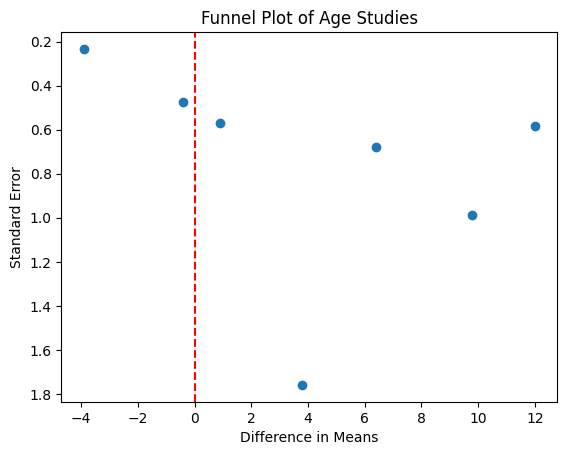

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sample data
data = {
    'ct_id': ['NCT01116648', 'NCT01306032', 'NCT02032823', 'NCT01945775', 'NCT03167619','NCT03330847',  'NCT02163694', 'NCT02000622', 'NCT02282020'],
    'number': [57.7, 57.0, 43.3, 48.1, 51.0,53.6, 46.8, 44, 59.2],
    'total_count': [155, 124, 1836, 431, 45, 273, 509, 302, 266],
    'dispersion_type': ['Full Range', 'Standard Deviation', 'Standard Deviation', 'Standard Deviation', 'Standard Deviation', 'Standard Deviation', 'Standard Deviation', 'Full Range', 'Standard Deviation'],
    'dispersion_value': [None, '11', '10.0', '11.80', '11.8','11.21',  '10.75', None, '9.5']
}

df = pd.DataFrame(data)

# Convert columns to appropriate types
df['number'] = pd.to_numeric(df['number'], errors='coerce')
df['total_count'] = pd.to_numeric(df['total_count'], errors='coerce')
df['dispersion_value'] = pd.to_numeric(df['dispersion_value'], errors='coerce')

# Filter rows where necessary data is available
df = df[df['dispersion_type'] == 'Standard Deviation']
df = df.dropna(subset=['number', 'total_count', 'dispersion_value'])

# Calculate difference in means and standard error
overall_mean = 47.2
df['difference_in_means'] = df['number'] - overall_mean
df['standard_error'] = df['dispersion_value'] / np.sqrt(df['total_count'])

# Create funnel plot
plt.scatter(df['difference_in_means'], df['standard_error'])
plt.xlabel('Difference in Means')
plt.ylabel('Standard Error')
plt.title('Funnel Plot of Age Studies')
plt.axvline(x=0, color='red', linestyle='--')
plt.gca().invert_yaxis() # Inverting y-axis for better interpretation of funnel plot
plt.show()


In [ ]:
num_unique_values = filtered_extracted_age_extra['nct_id'].nunique()
print(f"Number of unique values in 'category': {num_unique_values}")

# Print out the unique values in the 'category' column
unique_values = filtered_extracted_age_extra['nct_id'].unique()
print("Unique values in 'category':")
print(unique_values)

In [ ]:
### trial design

nct_id_list = ['NCT01306032', 'NCT02163694', 'NCT02282020', 'NCT02000622', 'NCT02032823', 
               'NCT03167619', 'NCT01818063', 'NCT01905592', 'NCT01116648', 'NCT01945775', 
               'NCT01506609', 'NCT03330847']

def extract_aact_design(nct_ids):
    connection = psycopg2.connect(
        database="aact",
        user= "achang",
        password="AChang2608",
        host="aact-db.ctti-clinicaltrials.org",
    )

    with closing(connection.cursor()) as cursor:
        query = f"""
        SELECT nct_id, allocation, intervention_model, masking, subject_masked, caregiver_masked, investigator_masked, outcomes_assessor_masked
        FROM designs
        WHERE nct_id IN ({', '.join(["'%s'" % id for id in nct_ids])});
        """
        cursor.execute(query)
        patients = cursor.fetchall()
        
        columns = [
        'nct_id',
        'allocation',
        'intervention_model',
        'masking',
        'subject_masked',
        'caregiver_masked',
        'investigator_masked',
        'outcomes_assessor_masked'
    ]

    df = pd.DataFrame(patients, columns=columns)

    nunique=df['nct_id'].nunique()
    unique_nct_ids = df['nct_id'].unique()
    #print(unique_nct_ids)
    print(nunique)
    return(df)
    



extracted_designs= extract_aact_design(nct_id_list)
print(extracted_designs)

# Specify the file name for your CSV
designs = "extracted_designs.csv"

# Save the DataFrame to a CSV file
extracted_designs.to_csv(designs, index=False)




In [ ]:

### interventions

nct_id_list = ['NCT01306032', 'NCT02163694', 'NCT02282020', 'NCT02000622', 'NCT02032823', 
               'NCT03167619', 'NCT01818063', 'NCT01905592', 'NCT01116648', 'NCT01945775', 
               'NCT01506609', 'NCT03330847']

def extract_aact_intervention(nct_ids):
    connection = psycopg2.connect(
        database="aact",
        user= "achang",
        password="AChang2608",
        host="aact-db.ctti-clinicaltrials.org",
    )

    with closing(connection.cursor()) as cursor:
        query = f"""
        SELECT d.nct_id, d.intervention_id, i.name, i.description, de.title
        FROM design_group_interventions d
        LEFT JOIN interventions i on d.intervention_id=i.id
        LEFT JOIN design_groups de on de.id=d.design_group_id
        WHERE d.nct_id IN ({', '.join(["'%s'" % id for id in nct_ids])});
        """
        cursor.execute(query)
        patients = cursor.fetchall()
        
        columns = [
        'nct_id',
        'intervention_id',
        'name',
        'description',
        'title'
    ]

    df = pd.DataFrame(patients, columns=columns)

    nunique=df['nct_id'].nunique()
    unique_nct_ids = df['nct_id'].unique()
    #print(unique_nct_ids)
    print(nunique)
    return(df)
    



extracted_intervention= extract_aact_intervention(nct_id_list)
print(extracted_intervention)



# Specify the file name for your CSV
interventions = "extracted_interventions.csv"

# Save the DataFrame to a CSV file
extracted_intervention.to_csv(interventions, index=False)



In [ ]:
#### sex


nct_id_list = ['NCT01306032', 'NCT02163694', 'NCT02282020', 'NCT02000622', 'NCT02032823', 
               'NCT03167619', 'NCT01818063', 'NCT01905592', 'NCT01116648', 'NCT01945775', 
               'NCT01506609', 'NCT03330847']

def extract_aact_sex(nct_ids):
    connection = psycopg2.connect(
        database="aact",
        user= "achang",
        password="AChang2608",
        host="aact-db.ctti-clinicaltrials.org",
    )

    with closing(connection.cursor()) as cursor:
        # Prepare the SQL query with format string for nct_ids
        query = f"""
            SELECT nct_id, result_group_id, ctgov_group_code, category,title, param_value
            FROM baseline_measurements
            WHERE (title ='Sex: Female, Male' )
            AND nct_id IN ({', '.join(["'%s'" % id for id in nct_ids])});
        """
        cursor.execute(query)
        patients = cursor.fetchall()

    columns = [
        'nct_id',
        'result_group_id',
        'ctgov_group_code',
        'category',
        'title',
        'param_value'
    ]

    df = pd.DataFrame(patients, columns=columns)

    nunique=df['nct_id'].nunique()
    unique_nct_ids = df['nct_id'].unique()
    #print(unique_nct_ids)
    #print(nunique)
    return(df)
    



extracted_sex= extract_aact_sex(nct_id_list)
#print(extracted_race)


max_result_group_id = extracted_sex.groupby('nct_id')['result_group_id'].transform('max')

# Select rows where 'result_group_id' is equal to the max within its group
filtered_extracted_sex = extracted_sex[extracted_sex['result_group_id'] == max_result_group_id]



# Specify the file name for your CSV
sex = "filtered_extracted_sex.csv"

# Save the DataFrame to a CSV file
filtered_extracted_sex.to_csv(sex, index=False)



In [ ]:
#### outcomes


nct_id_list = ['NCT01306032', 'NCT02163694', 'NCT02282020', 'NCT02000622', 'NCT02032823', 
               'NCT03167619', 'NCT01818063', 'NCT01905592', 'NCT01116648', 'NCT01945775', 
               'NCT01506609', 'NCT03330847']

def extract_aact_outcomes(nct_ids):
    connection = psycopg2.connect(
        database="aact",
        user= "achang",
        password="AChang2608",
        host="aact-db.ctti-clinicaltrials.org",
    )

    with closing(connection.cursor()) as cursor:
        # Prepare the SQL query with format string for nct_ids
        query = f"""
            SELECT nct_id, outcome_type, measure
            FROM design_outcomes
            WHERE nct_id IN ({', '.join(["'%s'" % id for id in nct_ids])}) ;
        """
        cursor.execute(query)
        patients = cursor.fetchall()

    columns = [
        'nct_id',
        'outcome_type',
        'measure'
    ]

    df = pd.DataFrame(patients, columns=columns)

    nunique=df['nct_id'].nunique()
    unique_nct_ids = df['nct_id'].unique()
    #print(unique_nct_ids)
    #print(nunique)
    return(df)

extracted_outcomes= extract_aact_outcomes(nct_id_list)
    
print(extracted_outcomes)